针对代码用到的数据增强策略，在图片上测试展示demo

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cv2 import cv2

(224, 224, 3)


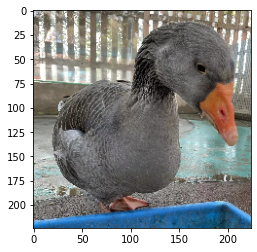

In [2]:
img_path = '/opt/data/private/projects/TDCUP2022/datasets/samples/dduck.jpg'

img = plt.imread(img_path)
img = cv2.resize(img, (224, 224))

print(img.shape)

plt.imshow(img)

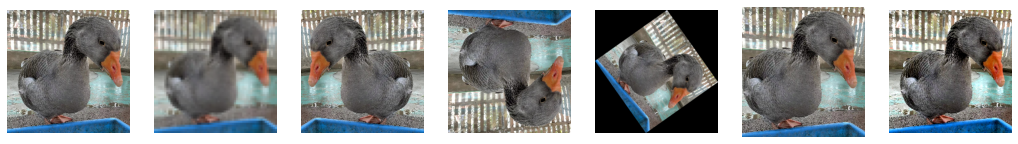

In [3]:
# # T.ResizeShortestEdge([400, 500, 600], sample_style="choice")
# detectron2.data.transforms.ResizeShortestEdge
# 保持纵横比不变，调整图像大小。尝试将短边放缩到给定的长度

"""
1. 原图
2. 最短边resize。在提供的list中，随机选择一个作为图像最短边进行resize。实验中采用[400, 500, 600]。
3. 水平翻转。概率0.5
4. 垂直翻转。概率0.5
5. 随即旋转.范围[0, 360]
6. 随即裁剪（相对范围）。实验中采用(0.9, 0.9)，这里为了突出效果采用(0.8, 0.4)
7. 随机对比度。0.5表示降低，1.5表示增强
"""

from detectron2.data import transforms as T

trans_list = []
trans_list.append(T.ResizeShortestEdge([40, 60, 80], sample_style="choice"))
trans_list.append(T.RandomFlip(prob=1, horizontal=True, vertical=False))
trans_list.append(T.RandomFlip(prob=1, horizontal=False, vertical=True))
trans_list.append(T.RandomRotation([0, 360]))
trans_list.append(T.RandomCrop("relative_range", (0.8, 0.4)))

trans_list.append(T.RandomContrast(0.5, 1.5))



img_list = [img]
for i in range(len(trans_list)):
    t_ = trans_list[i]
    _ = t_.get_transform(img)
    img_ = _.apply_image(img)
    img_list.append(img_)

# plot
row, col = 1, len(img_list)

plt.figure(figsize=(18, 4))

for i in range(col):
    plt.subplot(row, col, i + 1)
    plt.axis('off')
    plt.xticks([])
    plt.imshow(img_list[i])
plt.savefig('aug.png', dpi=800, bbox_inches='tight')
